# Imports

In [1]:
%load_ext autoreload
%autoreload 2
# from src.vnc import run_vnc_simulation


import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from pathlib import Path
from hydra import initialize, compose
from hydra.core.hydra_config import HydraConfig
import jax
# jax.config.update("jax_enable_x64", True)
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1' # Use GPU 0
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.95"
import sparse

from src.optimized_vnc import *
from src.plot_utils import *
from omegaconf import OmegaConf

In [2]:
experiment='Stim_Neurons'
with initialize(version_base=None, config_path="../configs"):
    cfg=compose(config_name='config.yaml', overrides= [f"experiment={experiment}", "paths=glados", "version=debug", f'run_id=Testing'],return_hydra_config=True,)
    HydraConfig.instance().set_config(cfg)

for k in cfg.paths.keys():
    if (k != 'user'):
        cfg.paths[k] = Path(cfg.paths[k])
        cfg.paths[k].mkdir(parents=True, exist_ok=True)


# base_dir ='/data/users/eabe/Pugliese_2025/BND2_Stim_Test/debug/run_id=noisy_input01'
# # base_dir ='/data/users/eabe/biomech_model/Flybody/RL_Flybody/debug/'
# # base_dir ='/Users/eabe/Research/data/biomech_model/Flybody/RL_Flybody/debug'

# run_cfg_list = sorted(list(Path(base_dir).rglob('config.yaml')))
# for n, run_cfg in enumerate(run_cfg_list):
#     print(n, run_cfg)

# ###### New runs ###### 
# # 0,1 Multiclip 3, 4
# # 2 Fly Run 5
# # 6 Fly Joystick
# cfg_num = -1 #30
# cfg = OmegaConf.load(run_cfg_list[cfg_num])
# # run_id = int(run_cfg_list[cfg_num].parent.parent.stem.split('=')[1])
# print('Loading:', cfg.dataset.env_name, run_cfg_list[cfg_num])
# fig_dir = Path('/data/users/eabe/biomech_model/Flybody/RL_Flybody/debug/figures')
# # fig_dir = Path('/Users/eabe/Research/data/biomech_model/Flybody/RL_Flybody/debug/Figures')
# ##### Reset paths for local computer #####
# dataset = cfg.dataset.env_name
# with initialize(version_base=None, config_path="configs"):
#     cfg_temp=compose(config_name='config.yaml',overrides= [f"dataset={dataset}", "paths=walle", "version=ckpt", f'run_id=Testing'],return_hydra_config=True,)
#     HydraConfig.instance().set_config(cfg_temp)

# cfg.paths = cfg_temp.paths
# for k in cfg.paths.keys():
#     if (k != 'user'):
#         cfg.paths[k] = Path(cfg.paths[k])
#         cfg.paths[k].mkdir(parents=True, exist_ok=True)


# experiment='default'
# with initialize(version_base=None, config_path="../configs"):
#     cfg_old=compose(config_name='config.yaml', overrides= [f"experiment={experiment}", "paths=glados", "version=debug", f'run_id=Testing'],return_hydra_config=True,)
#     HydraConfig.instance().set_config(cfg_old)

# for k in cfg_old.paths.keys():
#     if (k != 'user'):
#         cfg_old.paths[k] = Path(cfg_old.paths[k])
#         cfg_old.paths[k].mkdir(parents=True, exist_ok=True)


In [3]:
print("Loading network configuration...")
W_table = load_wTable(cfg.experiment.dfPath)
n_stim_configs = len(cfg.experiment.stimNeurons)
# Prepare parameters
neuron_params = prepare_neuron_params(cfg, W_table)
sim_params = prepare_sim_params(cfg, n_stim_configs, neuron_params.W.shape[0])
simulation_type = "baseline"

# results = run_simulation_batched(
#     neuron_params, sim_params, simulation_type,
#     batch_size=None
# )


Loading network configuration...


# Load results

In [3]:
cfg.paths.save_dir

PosixPath('/data/users/eabe/Pugliese_2025/BND2_Stim_Test/debug/run_id=Testing/experiment=Stim_Neurons')

In [7]:
# results = run_vnc_simulation_optimized(cfg)
# save_path = cfg.paths.ckpt_dir  / "bdn2.npz"
from src.sim_utils import compute_oscillation_score, neuron_oscillation_score

# results001 = sparse.load_npz("/data/users/eabe/Pugliese_2025/BND2_Stim_Test/debug/run_id=noisy_inputs/0/ckpt/BND2_Stim_Test_Rs.npz") .todense().astype(np.float32)
# results01 = sparse.load_npz("/data/users/eabe/Pugliese_2025/BND2_Stim_Test/debug/run_id=noisy_inputs/1/ckpt/BND2_Stim_Test_Rs.npz").todense().astype(np.float32)
# results1 = sparse.load_npz("/data/users/eabe/Pugliese_2025/BND2_Stim_Test/debug/run_id=noisy_inputs/2/ckpt/BND2_Stim_Test_Rs.npz").todense().astype(np.float32)
# results10 = sparse.load_npz("/data/users/eabe/Pugliese_2025/BND2_Stim_Test/debug/run_id=noisy_inputs/3/ckpt/BND2_Stim_Test_Rs.npz").todense().astype(np.float32)

results = sparse.load_npz('/data/users/eabe/Pugliese_2025/BND2_Stim_Test/debug/run_id=Testing/sim.noise=True/ckpt/BND2_Stim_Test_Rs.npz').todense().astype(np.float32)

In [5]:
np.where(np.all(np.sum(results,axis=-1)==0,axis=-1))

(array([], dtype=int64), array([], dtype=int64))

(array([3.58844179e+00, 0.00000000e+00, 1.89663957e-01, 3.18635398e-01,
        2.57942941e-01, 2.50356463e-01, 2.04837041e-01, 1.82077370e-01,
        1.74490813e-01, 1.82077370e-01, 1.66904256e-01, 1.74490924e-01,
        2.20010016e-01, 2.35183419e-01, 2.73115882e-01, 1.89664048e-01,
        2.20010295e-01, 2.50356225e-01, 4.02087781e-01, 2.04836911e-01,
        3.26222162e-01, 4.09673823e-01, 3.41394852e-01, 4.17261435e-01,
        4.32433479e-01, 4.62779688e-01, 4.32434578e-01, 5.23472107e-01,
        5.08299002e-01, 5.61404868e-01, 5.84166009e-01, 6.44856943e-01,
        7.05549361e-01, 6.37272010e-01, 7.35895570e-01, 7.43482122e-01,
        1.00142490e+00, 1.00142744e+00, 1.06970387e+00, 1.27454078e+00,
        1.75249803e+00, 3.46705439e+00, 1.68801217e+01, 7.58653300e-03,
        0.00000000e+00, 7.58653300e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.58657154e-03]),
 array([0.        , 0.02346246, 0.04692492, 0.07038737, 0.09384983,
        0.11731229, 0.1407

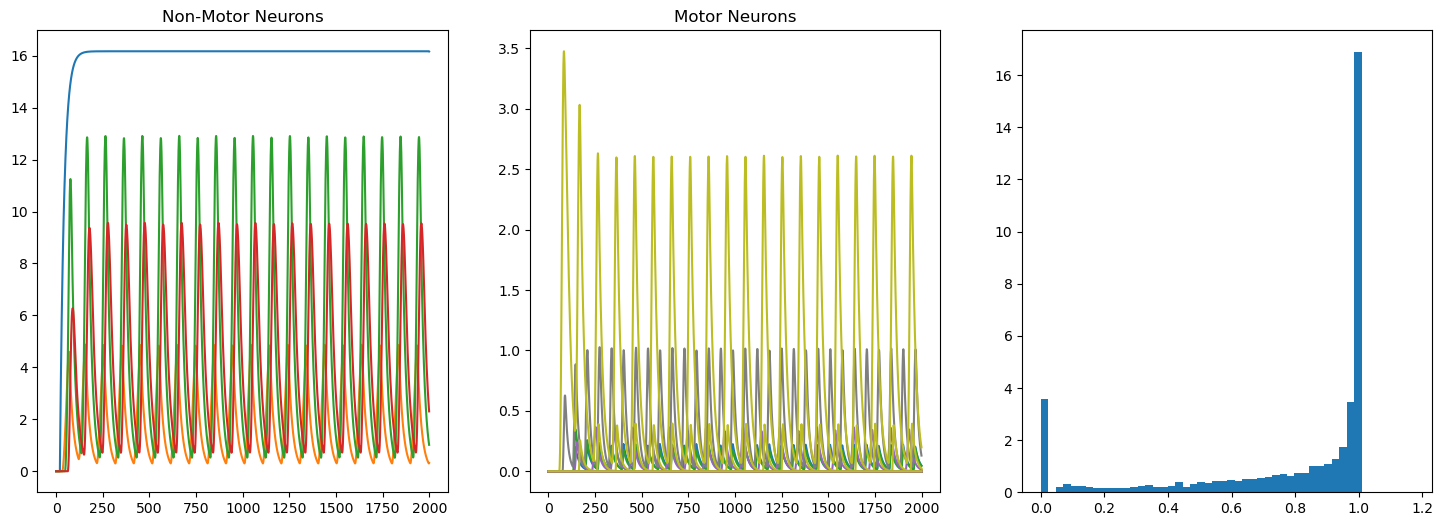

In [ ]:
R = results[0][20]


w_table = pd.read_csv("../data/manc t1 connectome data/wTable_20231020_DNtoMN_unsorted_withModules.csv",index_col=0)
nonMns_idx = w_table.loc[(w_table["bodyId"]==10093) | (w_table["bodyId"]==10707) | (w_table["bodyId"]==13905) | (w_table["bodyId"]==11751)].index
mn_idxs = jnp.asarray(w_table.loc[w_table["class"]=="motor neuron"].index.values)

fig, axs = plt.subplots(1,3, figsize=(18, 6))
for i in nonMns_idx:
    axs[0].plot(R[i])
axs[0].set_title("Non-Motor Neurons")
for i in mn_idxs:
    axs[1].plot(R[i])
axs[1].set_title("Motor Neurons")
start = int(cfg.sim.pulseStart/cfg.sim.dt) + 100

scores001 = []
for i in range(results.shape[1]):
    R = results[0][i]
    max_frs = jnp.max(R, axis=-1)
    active_mn_idxs = mn_idxs[max_frs[...,mn_idxs] > 0]
    activity = R[active_mn_idxs][..., start:]  # Adjusted to match the original code's start index
    score, frequency = jax.vmap(neuron_oscillation_score, in_axes=(0, None))(activity, 0.05)
    scores001.append(score)
scores001 = jnp.concatenate(scores001, axis=-1)
axs[2].hist(scores001, bins=50, density=True)
plt.savefig("/data/users/eabe/Pugliese_2025/BND2_Stim_Test/debug/run_id=Testing/sim.noise=True/figures/Example_R.png", dpi=300)
plt.show()


In [8]:
from src.sim_utils import compute_oscillation_score, neuron_oscillation_score
clip_start = 250
oscillation_threshold = 0.2
# Load data (this part stays on CPU)
w_table = load_wTable(cfg.experiment.dfPath)
n_stim_configs = len(cfg.experiment.stimNeurons)
## Initialize parameters
neuron_params = prepare_neuron_params(cfg, w_table)
sim_params = prepare_sim_params(cfg, n_stim_configs, neuron_params.W.shape[0])
all_neurons = w_table.index.to_numpy()
n_sims = sim_params.n_param_sets * sim_params.n_stim_configs
mn_idxs = jnp.asarray(w_table.loc[w_table["class"]=="motor neuron"].index.values)
in_idxs = jnp.setdiff1d(all_neurons, mn_idxs)
# max_frs = jnp.max(results[0], axis=-1)
# mn_mask = jnp.isin(jnp.arange(R.shape[0]), mn_idxs)
# active_mask = ((max_frs>0) & mn_mask)
prominence = 0.05
# Compute oscillation score
# oscillation_score, _ = compute_oscillation_score(R[..., clip_start:], active_mask, prominence=0.05)


In [16]:
results.shape, active_mask.shape

((1, 100, 4561, 2000), (100, 4561))

In [10]:
start = int(cfg.sim.pulseStart/cfg.sim.dt) + 100

scores001 = []
for i in range(results001.shape[1]):
    R = results001[0][i]
    max_frs = jnp.max(R, axis=-1)
    active_mn_idxs = mn_idxs[max_frs[...,mn_idxs] > 0]
    activity = R[active_mn_idxs][..., start:]  # Adjusted to match the original code's start index
    score, frequency = jax.vmap(neuron_oscillation_score, in_axes=(0, None))(activity, 0.05)
    scores001.append(score)
scores01 = []
for i in range(results01.shape[1]):
    R = results01[0][i]
    max_frs = jnp.max(R, axis=-1)
    active_mn_idxs = mn_idxs[max_frs[...,mn_idxs] > 0]
    activity = R[active_mn_idxs][..., start:]  # Adjusted to match the original code's start index
    score, frequency = jax.vmap(neuron_oscillation_score, in_axes=(0, None))(activity, 0.05)
    scores01.append(score)
scores1 = []
for i in range(results1.shape[1]):
    R = results1[0][i]
    max_frs = jnp.max(R, axis=-1)
    active_mn_idxs = mn_idxs[max_frs[...,mn_idxs] > 0]
    activity = R[active_mn_idxs][..., start:]  # Adjusted to match the original code's start index
    score, frequency = jax.vmap(neuron_oscillation_score, in_axes=(0, None))(activity, 0.05)
    scores1.append(score)
scores10 = []
for i in range(results10.shape[1]):
    R = results10[0][i]
    max_frs = jnp.max(R, axis=-1)
    active_mn_idxs = mn_idxs[max_frs[...,mn_idxs] > 0]
    activity = R[active_mn_idxs][..., start:]  # Adjusted to match the original code's start index
    score, frequency = jax.vmap(neuron_oscillation_score, in_axes=(0, None))(activity, 0.05)
    scores10.append(score)
    
    
    
# score, frequency = jax.vmap(neuron_oscillation_score, in_axes=(0, None))(activity, 0.05)
# print(f"Score: {jnp.nanmean(score)}, Frequency: {jnp.nanmean(frequency)}")

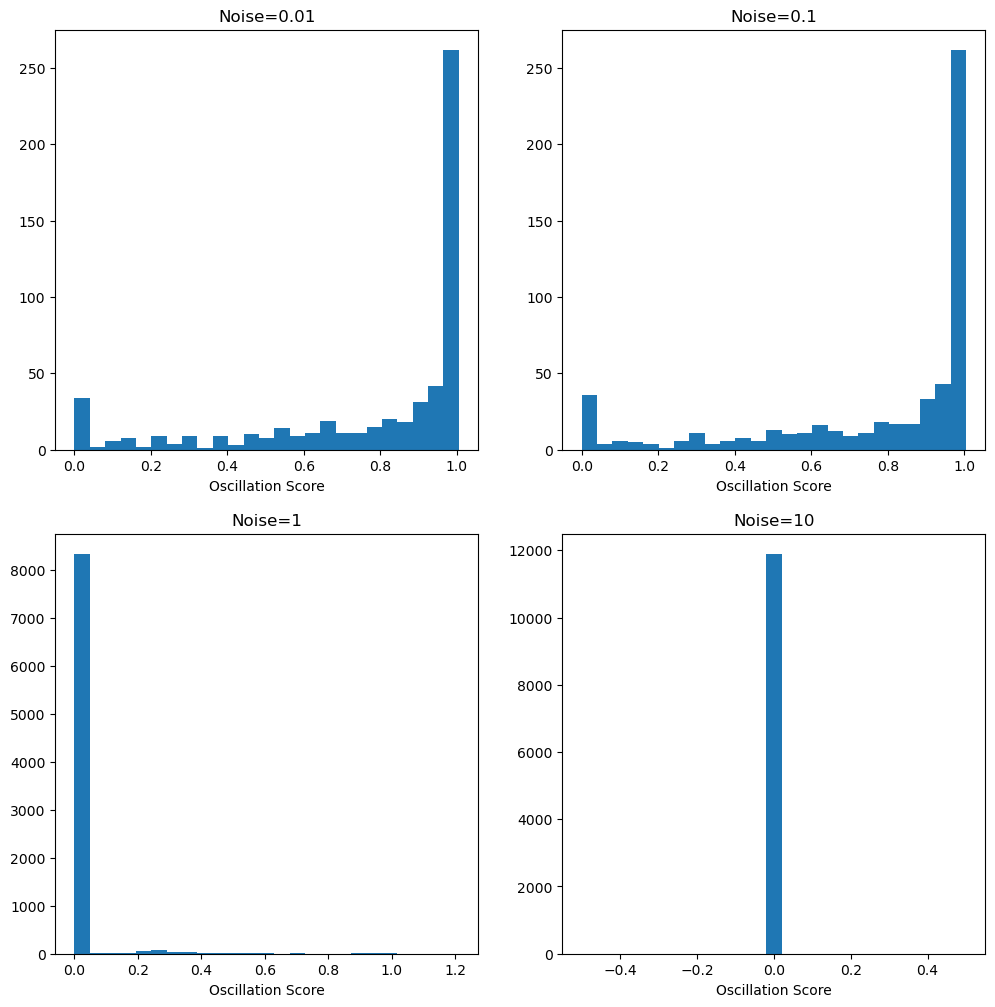

In [12]:
fig, axs = plt.subplots(2,2,figsize=(12, 12))
axs = axs.flatten()
axs[0].hist(jnp.concatenate(scores001, axis=-1), bins=25)
axs[0].set_xlabel("Oscillation Score")
axs[0].set_title("Noise=0.01")
axs[1].hist(jnp.concatenate(scores01, axis=-1), bins=25)
axs[1].set_xlabel("Oscillation Score")
axs[1].set_title("Noise=0.1")
axs[2].hist(jnp.concatenate(scores1, axis=-1), bins=25)
axs[2].set_xlabel("Oscillation Score")
axs[2].set_title("Noise=1")
axs[3].hist(jnp.concatenate(scores10, axis=-1), bins=25)
axs[3].set_xlabel("Oscillation Score")
axs[3].set_title("Noise=10")
plt.savefig("/data/users/eabe/Pugliese_2025/BND2_Stim_Test/debug/run_id=noisy_inputs/figures/oscillation_scores.png", dpi=300)

# Testing Shuffle

In [ ]:
params, config = load_vnc_net(cfg)
simulator = OptimizedSimulator(params, config)
# W, W_table = load_connectivity(cfg)

In [ ]:
work_queue = simulator._create_work_queue()

In [ ]:
from src.shuffle_utils import shuffle_W

In [ ]:
newkey, key = jax.random.split(work_queue[0]['seed'])
idxs = params.inh_dn_idxs
W = params.W
W_shuff = shuffle_W(W, key, idxs, independent=True)


# stim neurons for dn screen

In [ ]:
W, W_table = load_connectivity(cfg)
# CHANGE DEFAULTS
allExcDNs = W_table.loc[(W_table["class"] == "descending neuron") & (W_table["predictedNt"] == "acetylcholine")]
stimNeurons = allExcDNs.index.to_list()
stimNeurons = [[neuron] for neuron in stimNeurons]
nSims = len(stimNeurons)

# Check param dists

In [ ]:
from src.Archive.vnc_old import load_vnc_net as load_vnc_net_old
params, config = load_vnc_net(cfg)
params_old, config_old = load_vnc_net_old(cfg_old)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
for n, (orig,new) in enumerate(zip([params_old.tau,params_old.threshold,params_old.a,params_old.fr_cap], [params.tau, params.threshold, params.a, params.fr_cap])):
    axs[n].hist(orig.flatten(), bins=50, alpha=0.5, label='Sampled', density=True)
    axs[n].hist(new.flatten(), bins=50, alpha=0.5, label='Original', density=True)
    axs[n].set_title(f"Histogram of {n}")
    axs[n].set_xlabel(n)
    axs[n].set_ylabel("Frequency")

# Testing batchsizes

In [ ]:
params, config = load_vnc_net(cfg)

In [ ]:
batch_size = 200#2**6# cfg.experiment.batch_size
# batch_idx = 0  # Example batch index
work_queue = []
ntotal = 0
n_stim_configs = len(params.input_currents_list)
n_param_sets = n_replicates = 12345 # len(params.tau)
for stim_idx in range(n_stim_configs):
    for param_idx in range(n_param_sets):
        work_queue.append({"stim_idx":stim_idx, "param_idx":param_idx, "total_count": ntotal})
        ntotal +=1
all_results = []
all_metadata = []
n_batches = (len(work_queue) + batch_size - 1) // batch_size
for batch_idx in range(n_batches):
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, len(work_queue))
    actual_batch_size = end_idx - start_idx
    batch_work = work_queue[start_idx:end_idx]

    batch_params = {
        'tau_batch': jnp.array([item['total_count'] for item in batch_work]),
        'stim_batch': jnp.array([item['stim_idx'] for item in batch_work]),
        'param_batch': jnp.array([item['param_idx'] for item in batch_work])
    }

    batch_metadata = [
        {'param_idx': item['param_idx'], 'stim_idx': item['stim_idx'], 'total_count': item['total_count']} 
        for item in batch_work
    ]
    
    batch_size = len(batch_params['tau_batch'])
    n_devices = jax.device_count()
    # Pad to make divisible by n_devices
    pad_size = n_devices - (batch_size % n_devices) if batch_size % n_devices != 0 else 0
    print(pad_size, batch_size, n_devices)
    device_data = {}
    for key, data in batch_params.items():
    #     if pad_size > 0:
    #         # Pad with the last element
    #         if data.ndim == 1:
    #             padding = jnp.repeat(data[-1:], pad_size, axis=0)
    #         else:
    #             padding = jnp.repeat(data[-1:], pad_size, axis=0)
    #         data_padded = jnp.concatenate([data, padding])
    #     else:
    #         data_padded = data
        
        # Reshape for devices
        device_data[key] = data.reshape(n_devices, -1, *data.shape[1:])
    print(f"device_data: {device_data['tau_batch'].shape}, {device_data['stim_batch'].shape}, {device_data['param_batch'].shape}")


    batch_results = device_data['tau_batch'][:,:,None,None]
    batch_results_flat = batch_results.reshape(-1, *batch_results.shape[2:])
    batch_results_trimmed = batch_results_flat[:actual_batch_size]
    batch_results_trimmed = jax.device_put(batch_results_trimmed, jax.devices('cpu')[0])
    batch_results_trimmed = jnp.where(
            jnp.isinf(batch_results_trimmed) | jnp.isnan(batch_results_trimmed), 
            0, batch_results_trimmed
        )
    all_results.extend(batch_results_trimmed)
    all_metadata.extend(batch_metadata)
    print(f'batch:{batch_idx}, {batch_results_trimmed.squeeze()}')


In [ ]:
batch_size % n_devices, batch_size, n_devices
# batch_params['tau_batch'], len(work_queue)

In [ ]:

results_by_stim = {}
results_by_stim_total_ind = {}
# Initialize batch_results_trimmed containers
for stim_idx in range(n_stim_configs):
    results_by_stim[stim_idx] = [None] * n_param_sets
    results_by_stim_total_ind[stim_idx] = [None] * n_param_sets

# Place results in correct positions using metadata
for batch_results_trimmed, metadata in zip(all_results, all_metadata):
    param_idx = metadata['param_idx']
    stim_idx = metadata['stim_idx']
    
    # Validate indices
    if param_idx >= n_param_sets or stim_idx >= n_stim_configs:
        print(f"Warning: Invalid indices param_idx={param_idx}, stim_idx={stim_idx}")
        continue
    results_by_stim_total_ind[stim_idx][param_idx] = metadata['total_count']
    results_by_stim[stim_idx][param_idx] = batch_results_trimmed

# Convert to arrays and validate completeness
for stim_idx in results_by_stim:
    results_list = results_by_stim[stim_idx]
    result_inds = results_by_stim_total_ind[stim_idx]
    if (jnp.diff(jnp.array(results_by_stim_total_ind[stim_idx])) > 1).any():
        print(f"Warning: Inconsistent results for stimulus {stim_idx}, indices: {result_inds}")
    # Check for missing results
    missing_indices = [i for i, batch_results_trimmed in enumerate(results_list) if batch_results_trimmed is None]
    if missing_indices:
        print(f"Warning: Missing results for stimulus {stim_idx} at parameter indices: {missing_indices}")
        # Fill missing with zeros (same shape as other results)
        ref_shape = next(r.shape for r in results_list if r is not None)
        for idx in missing_indices:
            results_list[idx] = jnp.zeros(ref_shape)
    
    results_by_stim[stim_idx] = jnp.array(results_list)
results2 = jnp.stack([results_by_stim[n] for n in results_by_stim.keys()])


In [ ]:
results.shape

# Plot Results

In [6]:
np.where(np.all(np.sum(results,axis=-1)==0,axis=-1))

(array([], dtype=int64), array([], dtype=int64))

0.107310705


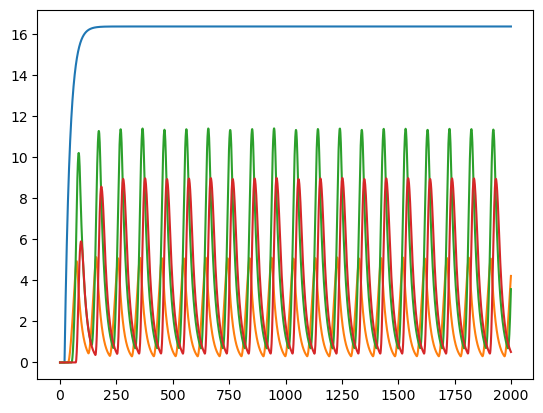

In [5]:
R = results[0][0]


wTable = pd.read_csv("../data/manc t1 connectome data/wTable_20231020_DNtoMN_unsorted_withModules.csv",index_col=0)
nonMns = wTable.loc[(wTable["bodyId"]==10093) | (wTable["bodyId"]==10707) | (wTable["bodyId"]==13905) | (wTable["bodyId"]==11751)]
mnIdxs = wTable.loc[wTable["class"]=="motor neuron"].index


for i in nonMns.index:
# for i in mnIdxs:
    plt.plot(R[i])
    #plt.plot(Rtsp[i])

print(np.mean(R))


## Testing osc score

In [ ]:
results = sparse.load_npz(cfg.paths.ckpt_dir  / "bdn2.npz").todense().astype(np.float32)

wTable = pd.read_csv("../data/manc t1 connectome data/wTable_20231020_DNtoMN_unsorted_withModules.csv",index_col=0)
nonMns = (wTable.loc[(wTable["bodyId"]==10093) | (wTable["bodyId"]==10707) | (wTable["bodyId"]==13905) | (wTable["bodyId"]==11751)]).values
mn_idxs = wTable.loc[wTable["class"]=="motor neuron"].index.values


In [ ]:
from scipy import signal
import numpy as np
def neuron_oscillation_score_helper_old(activity,prominence):
    activity = activity-np.min(activity)
    activity = 2 * activity/np.max(activity) - 1

    autocorr = np.correlate(activity,activity,mode="full") / np.inner(activity,activity)
    lags = signal.correlation_lags(len(activity),len(activity))
    autocorr = autocorr[lags>0]
    lags = lags[lags>0]

    peaks, peakProperties = signal.find_peaks(autocorr,height=(None,None),prominence=prominence)
    if len(peaks) > 0:
        score = np.min([np.max(peakProperties["peak_heights"]),np.max(peakProperties["prominences"])])
        frequency = 1 / peaks[np.argmax(peakProperties["prominences"])]
    else:
        score = 0
        frequency = 0

    return score, frequency

def neuron_oscillation_score_old(activity, returnFrequency=False,prominence=0.05):
    rawScore, frequency = neuron_oscillation_score_helper_old(activity,prominence)
    # normalize to sine wave of the same frequency and duration
    if rawScore == 0:
        score = 0
    else:
        refSinScore, _ = neuron_oscillation_score_helper_old(np.sin(2*np.pi*frequency*np.arange(len(activity))),prominence)
        refCosScore, _ = neuron_oscillation_score_helper_old(np.cos(2*np.pi*frequency*np.arange(len(activity))),prominence)
        refScore = np.max((refSinScore,refCosScore))
        score = rawScore / refScore

    if returnFrequency:
        return score, frequency
    else:
        return score

def sim_oscillation_score_old(R,activeMnIdxs,start=None,end=None,returnFrequency=False):
    """calculate oscillation score for a simulation"""
    if start is None:
        start = 0
    if end is None:
        end = -1

    if returnFrequency:
        neuronOscillationScores = []
        frequencies = []

        for j in activeMnIdxs:
            score, freq = neuron_oscillation_score_old(R[j][start:end],returnFrequency=True)
            neuronOscillationScores.append(score)
            frequencies.append(freq)
        return np.mean(neuronOscillationScores), np.nanmean(frequencies)
        
    else:
        neuronOscillationScores = [neuron_oscillation_score_old(R[j][start:end]) for j in activeMnIdxs] # scores for each neuron
        return np.mean(neuronOscillationScores) # average for the simulation
    
    

In [ ]:
R = results[0][19]
np_R = np.asarray(R)
maxFrs = np.max(np_R,axis=-1)
activeMnIdxs = mnIdxs[maxFrs[mnIdxs]>0]
plt.plot(np_R[activeMnIdxs].T)
plt.show()

In [ ]:
R = results[1][1]

score, freq = sim_oscillation_score_old(R,activeMnIdxs,start=250,end=None,returnFrequency=True)
print(f"Score: {score}, Frequency: {freq}")

In [ ]:
from src.sim_utils import neuron_oscillation_score


In [ ]:
start = int(cfg.sim.pulseStart/cfg.sim.dt) + 100
R = results[0][0]

max_frs = jnp.max(R, axis=-1)
active_mn_idxs = mn_idxs[max_frs[...,mn_idxs] > 0]
activity = R[active_mn_idxs][..., start:]  # Adjusted to match the original code's start index

score, frequency = jax.vmap(neuron_oscillation_score, in_axes=(0, None))(activity, 0.05)
print(f"Score: {jnp.nanmean(score)}, Frequency: {jnp.nanmean(frequency)}")

# Testing Pruning

In [8]:
from src.sim_utils import neuron_oscillation_score

experiment='prune_test'
with initialize(version_base=None, config_path="../configs"):
    cfg=compose(config_name='config.yaml', overrides= [f"experiment={experiment}", "paths=glados", "version=debug", f'run_id=Testing'],return_hydra_config=True,)
    HydraConfig.instance().set_config(cfg)

for k in cfg.paths.keys():
    if (k != 'user'):
        cfg.paths[k] = Path(cfg.paths[k])
        cfg.paths[k].mkdir(parents=True, exist_ok=True)

def print_inds(arr, name=''):
    print(f"Indices for {name}: {jnp.where(arr)[0].shape}")
    return jnp.where(arr)[-1]


##### Temp parames testing

In [ ]:
results = run_vnc_simulation_optimized(cfg)

In [ ]:
def extract_nth_filtered_pytree(pytree, n, path_filter, key_list=['tau', 'threshold', 'a', 'fr_cap', 'W_mask']):
    """
    path_filter: function that takes key_path tuple and returns True/False
    """
    def process_leaf(key_path, leaf):
        if path_filter(key_path, key_list):
            return leaf[n:n+1]
        return leaf

    return jax.tree.map_with_path(process_leaf, pytree)

def path_filter(key_path, key_list):
    """
    Filter function that checks if the key_path contains specific keys.
    """
    return key_path[0].name in key_list and key_path != []

In [ ]:
temp_params = extract_nth_filtered_pytree(neuron_params, 0, path_filter)
for att in temp_params:
    if jnp.ndim(att) > 0:
        print(att.shape)

In [340]:
total_sims = 1
batch_size = calculate_optimal_batch_size(sim_params.n_neurons, len(sim_params.t_axis))
start_idx = i * batch_size
end_idx = min((i + 1) * batch_size, total_sims)

batch_indices = jnp.arange(start_idx, end_idx)

temp_params = extract_nth_filtered_pytree(neuron_params, 0, path_filter)

batch_results = process_batch_baseline(temp_params, sim_params, jnp.zeros(1,dtype=jnp.int32)).squeeze() # Single simulation result

In [7]:
W_table = load_wTable(cfg.experiment.dfPath)
n_stim_configs = len(cfg.experiment.stimNeurons)

# Prepare parameters
neuron_params = prepare_neuron_params(cfg, W_table)
sim_params = prepare_sim_params(cfg, n_stim_configs, neuron_params.W.shape[0])

# results = sparse.load_npz(cfg.paths.ckpt_dir  / "bdn2.npz").todense().astype(np.float32)

W_table = pd.read_csv("../data/manc t1 connectome data/wTable_20231020_DNtoMN_unsorted_withModules.csv",index_col=0)
nonMns = (W_table.loc[(W_table["bodyId"]==10093) | (W_table["bodyId"]==10707) | (W_table["bodyId"]==13905) | (W_table["bodyId"]==11751)]).values
mnIdxs = W_table.loc[W_table["class"]=="motor neuron"].index.values

# n_sims = results.shape[0]

In [248]:
all_neurons = np.arange(sim_params.n_neurons)
mn_idxs = jnp.asarray(W_table.loc[W_table["class"]=="motor neuron"].index.values)
in_idxs = jnp.setdiff1d(all_neurons, mn_idxs)
removed_stim_neurons = jnp.full([n_sims, neuron_params.removed_neurons.shape[-1]], -1, dtype=jnp.int32)
prev_neurons_put_back = jnp.full([n_sims, neuron_params.removed_neurons.shape[-1]], -1, dtype=jnp.int32)


######

"""JAX-compatible version of run_pruning_from_params"""
max_neurons = 4561  # Maximum neurons to put back in a single iteration
n_sims = sim_params.n_param_sets * sim_params.n_stim_configs

# Initialize state arrays
level = jnp.zeros(n_sims, dtype=jnp.int32)
last_removed = jnp.full([n_sims, neuron_params.removed_neurons.shape[-1]], -1, dtype=jnp.int32)  # Use -1 for None
neurons_put_back = jnp.full([n_sims, neuron_params.removed_neurons.shape[-1]], -1, dtype=jnp.int32)
min_circuit = jnp.full(n_sims, False)

# Initialize probabilities
p_arrays = []
for i in range(n_sims):
    exclude_mask = jnp.isin(in_idxs, jnp.concatenate([removed_stim_neurons[i]]))
    p_i = removal_probability(jnp.ones_like(in_idxs), exclude_mask)
    p_arrays.append(p_i)

p_arrays[0]

Array([0.00022512, 0.00022512, 0.00022512, ..., 0.00022512, 0.00022512,
       0.00022512], dtype=float32)

In [249]:
oscillation_threshold=0.1
iter_start = 0  # Starting iteration
# Create master random key
# master_key = random.PRNGKey(neuron_params.seeds, 42)

# Main pruning loop
iteration = iter_start
max_iterations = 1000  # Safety limit

# while not jnp.all(min_circuit) and iteration < max_iterations:
print(f"Iteration {iteration}")

# Resample seeds for non-converged simulations
resample_idxs = jnp.where(~min_circuit)[0]

# Run simulation (this would call your simulation function)
# For now, creating dummy data - replace with actual simulation results
Rs = [jnp.ones((len(in_idxs) + len(mn_idxs), 1000)) for _ in range(n_sims)]
# Update each simulation state
# for i in range(n_sims):
i = 0  # Example index, replace with actual loop
# if min_circuit[i]:
#     continue
    
state = (
    neuron_params.removed_neurons,  # array for removed neurons
    neurons_put_back[i],
    last_removed[i],
    p_arrays[i],
    level[i],
    removed_stim_neurons[i],
    neuron_params.seeds[i],
)
state
# new_state = update_single_sim_state(
#     state, Rs[i], mn_idxs, in_idxs, oscillation_threshold
# )

Iteration 0


(Array([-1, -1, -1, ..., -1, -1, -1], dtype=int32),
 Array([-1, -1, -1, ..., -1, -1, -1], dtype=int32),
 Array([-1, -1, -1, ..., -1, -1, -1], dtype=int32),
 Array([0.00022512, 0.00022512, 0.00022512, ..., 0.00022512, 0.00022512,
        0.00022512], dtype=float32),
 Array(0, dtype=int32),
 Array([-1, -1, -1, ..., -1, -1, -1], dtype=int32),
 Array([ 726863002, 2265770120], dtype=uint32))

In [250]:

@jax.jit
def compute_oscillation_score(activity, active_mask, prominence=0.05):
    # Compute scores for all neurons (will be NaN for inactive ones)
    scores = jax.vmap(
        lambda activity_row, mask: jax.lax.cond(
            mask,
            lambda x: neuron_oscillation_score(x, prominence=prominence),
            lambda x: (jnp.nan, jnp.nan),
            activity_row
        ),
        in_axes=(0, 0)
    )(activity, active_mask)
    score_values, frequencies = scores
    # Compute mean of valid scores
    oscillation_score = jnp.nanmean(score_values)
    frequencies = jnp.nanmean(frequencies)
    return oscillation_score, frequencies

In [ ]:
max_frs = jnp.max(R, axis=-1)
mn_mask = jnp.isin(jnp.arange(R.shape[0]), mn_idxs)
active_mask = ((max_frs>0) & mn_mask)  # Combine max_frs with mn_mask to get active neurons

oscillation_score, frequencies = compute_oscillation_score(R, active_mask, prominence=0.05)


In [ ]:
start = int(cfg.sim.pulseStart/cfg.sim.dt) + 100

max_frs = jnp.max(R, axis=-1)
active_mn_idxs = mn_idxs[max_frs[...,mn_idxs] > 0]
activity = R[active_mn_idxs][..., start:]  # Adjusted to match the original code's start index

score, frequency = jax.vmap(neuron_oscillation_score, in_axes=(0, None))(activity, 0.05)
print(f"Score: {jnp.nanmean(score)}, Frequency: {jnp.nanmean(frequency)}")

In [112]:
new_p = removal_probability(max_frs[in_idxs], exclude_mask)

In [256]:
new_remove_neurons = jnp.setdiff1d(remove_neurons, jnp.array([last_removed]), size=len(remove_neurons), fill_value=-1)

In [270]:
(remove_neurons, neurons_put_back, last_removed, p, level, removed_stim_neurons, key) = state

@jax.jit
def get_pos_val_indices(arr, max_indices=None):
    if max_indices is None:
        max_indices = arr.shape[0]  # Use full array size as max
    
    indices = jnp.where(arr >= 0, size=max_indices, fill_value=-1)[0]
    return indices

@jax.jit
def continue_branch(key):
    # Get max firing rates for all neurons
    max_frs = jnp.max(R, axis=1)
    
    # Remove silent interneurons
    silent_mask = (max_frs == 0)
    silent_in_mask = silent_mask[in_idxs]
    silent_ins = jnp.where(silent_in_mask, in_idxs, -1)
    # silent_ins = silent_ins[silent_ins >= 0]  # Filter out -1 values

    new_remove_neurons = get_pos_val_indices(silent_ins)

    # Update probabilities based on firing rates
    exclude_mask = jnp.isin(in_idxs, neurons_put_back) | jnp.isin(in_idxs, removed_stim_neurons)
    new_p = removal_probability(max_frs[in_idxs], exclude_mask)
    
    # Check if we can continue
    p_sum = jnp.sum(new_p)
    converged = p_sum <= 1e-10
    
    key, subkey = random.split(key)
    neuron_idx = jax_choice(subkey, jnp.arange(len(in_idxs)), new_p)
    new_neuron_to_remove = neurons_put_back.at[in_idxs[neuron_idx]].set(1)

    new_remove_neurons = jnp.where((new_remove_neurons>0 )| (new_neuron_to_remove>0), 1, -1)

    return (new_remove_neurons, neurons_put_back, new_neuron_to_remove,
            new_p, level, removed_stim_neurons, key, converged)
    
@jax.jit
def reset_branch(key):
    # Put back the last removed neuron
    new_remove_neurons = jnp.setdiff1d(remove_neurons, jnp.array([last_removed]), size=len(remove_neurons), fill_value=-1)
    # Combine neurons_put_back and last_removed into a single mask
    new_neurons_put_back = jnp.where((neurons_put_back >= 0) & (last_removed >= 0), 1, -1)


    # Update probabilities to exclude put-back neurons
    exclude_mask = jnp.isin(in_idxs, new_neurons_put_back) | jnp.isin(in_idxs, removed_stim_neurons)
    new_p = removal_probability(jnp.ones(len(in_idxs)), exclude_mask)
    
    # Check if we can continue
    p_sum = jnp.sum(new_p)
    converged = p_sum <= 1e-10
    
    key, subkey = random.split(key)
    neuron_idx = jax_choice(subkey, jnp.arange(len(in_idxs)), new_p)
    new_neuron_to_remove = neurons_put_back.at[in_idxs[neuron_idx]].set(1)
    
    new_remove_neurons = jnp.where((new_remove_neurons>0 )| (new_neuron_to_remove>0), 1, -1)
    
    return (new_remove_neurons, new_neurons_put_back, new_neuron_to_remove, 
            new_p, level, removed_stim_neurons, key, converged)

In [51]:
def print_pytree(pytree):
    """
    path_filter: function that takes key_path tuple and returns True/False
    """
    def process_leaf(key_path, leaf):
       print(f"Key Path: {key_path[0]}, Leaf: {leaf.shape}")

    return jax.tree.map_with_path(process_leaf, pytree)
print_pytree(state)

Key Path: .W_mask, Leaf: (1, 4561, 4561)
Key Path: .in_idxs, Leaf: (4442,)
Key Path: .level, Leaf: (1,)
Key Path: .removed_neurons, Leaf: (1, 4442)
Key Path: .removed_stim_neurons, Leaf: (1, 4442)
Key Path: .neurons_put_back, Leaf: (1, 4442)
Key Path: .last_removed, Leaf: (1, 4442)
Key Path: .remove_p, Leaf: (1, 4442)
Key Path: .min_circuit, Leaf: (1,)
Key Path: .keys, Leaf: (1, 2)


Pruning_state(W_mask=None, in_idxs=None, level=None, removed_neurons=None, removed_stim_neurons=None, neurons_put_back=None, last_removed=None, remove_p=None, min_circuit=None, keys=None)

In [286]:
new_state = update_single_sim_state(state, R, mn_idxs, in_idxs, oscillation_threshold)
print('Next state:')
for att in new_state:
    if jnp.ndim(att) > 0:
        print(jnp.where(att>0))

Next state:
(Array([   1,    2,    3, ..., 4241, 4242, 4243], dtype=int32),)
(Array([], shape=(0,), dtype=int32),)
(Array([2324], dtype=int32),)
(Array([   0,    1,    2, ..., 4439, 4440, 4441], dtype=int32),)
(Array([], shape=(0,), dtype=int32),)
(Array([0, 1], dtype=int32),)


In [271]:
# (remove_neurons, neurons_put_back, last_removed, p, level, removed_stim_neurons, key)
next_state = continue_branch(key)
reset_state = reset_branch(key)
next_state, reset_state

((Array([-1,  1,  1, ..., -1, -1, -1], dtype=int32, weak_type=True),
  Array([-1, -1, -1, ..., -1, -1, -1], dtype=int32),
  Array([-1, -1, -1, ..., -1, -1, -1], dtype=int32),
  Array([0.00018046, 0.00018046, 0.00018046, ..., 0.00018046, 0.00018046,
         0.00018046], dtype=float32),
  Array(0, dtype=int32),
  Array([-1, -1, -1, ..., -1, -1, -1], dtype=int32),
  Array([ 906402197, 4248685058], dtype=uint32),
  Array(False, dtype=bool)),
 (Array([-1, -1, -1, ..., -1, -1, -1], dtype=int32, weak_type=True),
  Array([-1, -1, -1, ..., -1, -1, -1], dtype=int32, weak_type=True),
  Array([-1, -1, -1, ..., -1, -1, -1], dtype=int32),
  Array([0.00022512, 0.00022512, 0.00022512, ..., 0.00022512, 0.00022512,
         0.00022512], dtype=float32),
  Array(0, dtype=int32),
  Array([-1, -1, -1, ..., -1, -1, -1], dtype=int32),
  Array([ 906402197, 4248685058], dtype=uint32),
  Array(False, dtype=bool)))

In [272]:
(new_remove_neurons, new_neurons_put_back, new_neuron_to_remove,new_p, new_level, new_removed_stim_neurons, new_key, cnew_onverged) = next_state


In [ ]:
(reset_remove_neurons, reset_neurons_put_back, reset_neuron_to_remove, reset_p, reset_level, reset_removed_stim_neurons, reset_key, reset_converged) = reset_state

In [280]:
print('Next state:')
for att in next_state:
    if jnp.ndim(att) > 0:
        print(jnp.where(att>0))
print('Reset state:')
for att in reset_state:
    if jnp.ndim(att) > 0:
        print(jnp.where(att>0))

Next state:
(Array([   1,    2,    3, ..., 4241, 4242, 4243], dtype=int32),)
(Array([], shape=(0,), dtype=int32),)
(Array([2324], dtype=int32),)
(Array([   0,    1,    2, ..., 4439, 4440, 4441], dtype=int32),)
(Array([], shape=(0,), dtype=int32),)
(Array([0, 1], dtype=int32),)
Reset state:
(Array([2324], dtype=int32),)
(Array([], shape=(0,), dtype=int32),)
(Array([2324], dtype=int32),)
(Array([   0,    1,    2, ..., 4439, 4440, 4441], dtype=int32),)
(Array([], shape=(0,), dtype=int32),)
(Array([0, 1], dtype=int32),)


In [22]:
simulation_type = "baseline"
Rs = run_simulation_batched(
    neuron_params, sim_params, simulation_type,
    batch_size=getattr(cfg.experiment, "batch_size", None)
)

Running 1 simulations with batch size 10
Batch 1/1 completed


In [ ]:
# Get active MN activity using JAX-compatible approach
max_frs = jnp.max(R, axis=-1)
mn_mask = jnp.isin(jnp.arange(R.shape[0]), mn_idxs)
active_mask = ((max_frs>0) & mn_mask)  # Combine max_frs with mn_mask to get active neurons

oscillation_score, _ = compute_oscillation_score(R[..., start:], active_mask, prominence=0.05)

(1, 1, 4561, 2000)

In [276]:
oscillation_threshold = 0.1
# Load data (this part stays on CPU)
w_table = load_wTable(cfg.experiment.dfPath)
n_stim_configs = len(cfg.experiment.stimNeurons)

## Initialize parameters
neuron_params = prepare_neuron_params(cfg, w_table)
sim_params = prepare_sim_params(cfg, n_stim_configs, neuron_params.W.shape[0])
all_neurons = w_table.index.to_numpy()


# Initialize state
n_sims = sim_params.n_param_sets * sim_params.n_stim_configs
mn_idxs = jnp.asarray(w_table.loc[w_table["class"]=="motor neuron"].index.values)
in_idxs = jnp.setdiff1d(all_neurons, mn_idxs)
removed_stim_neurons = jnp.full([n_sims, neuron_params.removed_neurons.shape[-1]], -1, dtype=jnp.int32)
prev_neurons_put_back = jnp.full([n_sims, neuron_params.removed_neurons.shape[-1]], -1, dtype=jnp.int32)


((Array([   1,    2,    3, ..., 4241, 4242, 4243], dtype=int32),),
 (Array([], shape=(0,), dtype=int32),),
 (Array([2324], dtype=int32),),
 (Array([], shape=(0,), dtype=int32),))

## full pipeline testing

In [27]:
from src.prune_net import *

In [10]:
oscillation_threshold = 0.2
# Load data (this part stays on CPU)
w_table = load_wTable(cfg.experiment.dfPath)
n_stim_configs = len(cfg.experiment.stimNeurons)
## Initialize parameters
neuron_params = prepare_neuron_params(cfg, w_table)
sim_params = prepare_sim_params(cfg, n_stim_configs, neuron_params.W.shape[0])
all_neurons = w_table.index.to_numpy()
n_sims = sim_params.n_param_sets * sim_params.n_stim_configs
mn_idxs = jnp.asarray(w_table.loc[w_table["class"]=="motor neuron"].index.values)
in_idxs = jnp.setdiff1d(all_neurons, mn_idxs)
clip_start = int(cfg.sim.pulseStart / cfg.sim.dt) + 100

total_sims = sim_params.n_stim_configs * sim_params.n_param_sets
batch_size = getattr(cfg.experiment, "batch_size", None)
if batch_size is None:
    batch_size = calculate_optimal_batch_size(
        sim_params.n_neurons, len(sim_params.t_axis)
    )
    
batch_func = process_batch_prune
# Create parallel version for multiple devices
if jax.device_count() > 1:
    batch_func = pmap(batch_func, axis_name="device", in_axes=(None, None, 0))
    batch_size = (batch_size // jax.device_count()) * jax.device_count()

print(f"Running {total_sims} simulations with batch size {batch_size}")

# Process in batches
all_results = []
n_batches = (total_sims + batch_size - 1) // batch_size

# for i in range(n_batches):
i = 0 
start_idx = i * batch_size
end_idx = min((i + 1) * batch_size, total_sims)

batch_indices = jnp.arange(start_idx, end_idx)

# Pad if necessary for pmap
if jax.device_count() > 1 and len(batch_indices) < batch_size:
    pad_size = batch_size - len(batch_indices)
    batch_indices = jnp.concatenate([
        batch_indices, 
        jnp.repeat(batch_indices[-1], pad_size)
    ])


Running 2 simulations with batch size 10


NeuronParams(W=Array([[ 0., 24.,  0., ...,  0.,  0.,  0.],
       [25.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32), W_mask=Array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]], dtype=float32), tau=Array([[0.02106387, 0.01855396, 0.02181451, ..., 0.01752623, 0.01848506,
        0.01851873],
       [0.01703173, 0.0196871 , 0.02131761, ..., 0.01660451, 0.01891685,


In [ ]:

mn_idxs = neuron_params.mn_idxs
all_neurons = jnp.arange(neuron_params.W.shape[-1])
in_idxs = jnp.setdiff1d(all_neurons, mn_idxs)

clip_start = int(sim_params.pulse_start / sim_params.dt) + 100
# Initialize state
n_sims = sim_params.n_param_sets * sim_params.n_stim_configs
W_mask = jnp.full((n_sims, neuron_params.W.shape[0], neuron_params.W.shape[1]), 1, dtype=jnp.float32)
interneuron_mask = jnp.full((n_sims, W_mask.shape[-1]),fill_value=False, dtype=jnp.bool_)
interneuron_mask = interneuron_mask.at[:,in_idxs].set(True)
level = jnp.zeros((n_sims,1), dtype=jnp.int32)
total_removed_neurons = jnp.full((n_sims, W_mask.shape[-1]), False, dtype=jnp.bool)
removed_stim_neurons = jnp.full([n_sims, total_removed_neurons.shape[-1]], False, dtype=jnp.bool)
neurons_put_back =  jnp.full([n_sims, total_removed_neurons.shape[-1]], False, dtype=jnp.bool)
last_removed =  jnp.full([n_sims, total_removed_neurons.shape[-1]], False, dtype=jnp.bool) # Use False for None
min_circuit = jnp.full((n_sims,1), False)

# Initialize probabilities
exclude_mask = (~interneuron_mask)
p_arrays = jax.vmap(removal_probability)(jnp.ones(len(interneuron_mask)), exclude_mask)

# initialize pruning state
state = Pruning_state(
    W_mask=W_mask,
    interneuron_mask=interneuron_mask,
    level=level,
    total_removed_neurons=total_removed_neurons,
    removed_stim_neurons=removed_stim_neurons,
    neurons_put_back=neurons_put_back,
    last_removed=last_removed,
    remove_p=p_arrays,
    min_circuit=min_circuit,
    keys=neuron_params.seeds
)

iter_start = 0  # Starting iteration
# Main pruning loop
iteration = iter_start
max_iterations = 1  # Safety limit
while not jnp.all(min_circuit) and (iteration < max_iterations):
    start_time = time.time()
    print(f"Iteration {iteration}")
    # Update neuron parameters W_mask based on the current state
    neuron_params = neuron_params._replace(W_mask=state.W_mask)
    # Run simulation (this would call your simulation function)
    # Reshape for devices if using pmap
    if jax.device_count() > 1:
        batch_indices = batch_indices.reshape(jax.device_count(), -1)
        batch_results = batch_func(neuron_params, sim_params, batch_indices)
        batch_results = batch_results.reshape(-1, *batch_results.shape[2:])
        batch_results = batch_results[:end_idx - start_idx]  # Remove padding
    else:
        batch_results = batch_func(neuron_params, sim_params, batch_indices)
    
    n = 0 
    state = jax.vmap(update_single_sim_state, in_axes=(0, 0, None, None, None))(state, batch_results, mn_idxs, oscillation_threshold, clip_start)
    iteration += 1
    
    elapsed = time.time() - start_time
    print(f"  Total time: {elapsed:.2f} seconds")

# batch_results = jax.device_put(batch_results, jax.devices("cpu")[0])
# all_results.append(batch_results)
# print(f"Batch {i + 1}/{n_batches} completed")

# del batch_results  # Free memory
# gc.collect()  # Force garbage collection

# Combine results
# results = jnp.concatenate(all_results, axis=0)

Iteration 0




2025-07-22 20:29:55.158050: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-07-22 20:29:55.634710: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-07-22 20:29:55.649603: E external/xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng28{k2=4,k3=0} for conv %cudnn-conv = (f32[1,9122,3759]{2,1,0}, u8[0]{0}) custom-call(%bitcast.18, %bitcast.19), window={size=1880 pad=1879_1879}, dim_labels=bf0_oi0->bf0, feature_group_count=9122, custom_call_target="__cudnn$convForward", metadata={op_name="jit(update_single_sim_state)/jit(main)/jit(compute_oscillation_score)/vmap(jit(neuron_oscillation_score))/jit(neuron_oscillation_score_helper_jax)/jit(correlate)/jit(_conv)/conv_gen

Oscillation score: 0.7551005482673645
Oscillation score: 0.887699544429779
Reset condition (below threshold): False
Reset condition (below threshold): False
Available neurons: 197
Available neurons: 172
Level: [1]
Level: [1]
Oscillation detected: False
Oscillation detected: False
Final converged: False
Final converged: False
Silent neurons removed: 4244
Silent neurons removed: 4269
  Total time: 34.37 seconds


In [35]:

mn_idxs = neuron_params.mn_idxs
all_neurons = jnp.arange(neuron_params.W.shape[-1])
in_idxs = jnp.setdiff1d(all_neurons, mn_idxs)

clip_start = int(sim_params.pulse_start / sim_params.dt) + 100
# Initialize state
n_sims = sim_params.n_param_sets * sim_params.n_stim_configs
W_mask = jnp.full((n_sims, neuron_params.W.shape[0], neuron_params.W.shape[1]), 1, dtype=jnp.float32)
interneuron_mask = jnp.full((n_sims, W_mask.shape[-1]),fill_value=False, dtype=jnp.bool_)
interneuron_mask = interneuron_mask.at[:,in_idxs].set(True)
level = jnp.zeros((n_sims,1), dtype=jnp.int32)
total_removed_neurons = jnp.full((n_sims, W_mask.shape[-1]), False, dtype=jnp.bool)
removed_stim_neurons = jnp.full([n_sims, total_removed_neurons.shape[-1]], False, dtype=jnp.bool)
neurons_put_back =  jnp.full([n_sims, total_removed_neurons.shape[-1]], False, dtype=jnp.bool)
last_removed =  jnp.full([n_sims, total_removed_neurons.shape[-1]], False, dtype=jnp.bool) # Use False for None
min_circuit = jnp.full((n_sims,1), False)

# Initialize probabilities
exclude_mask = (~interneuron_mask)
p_arrays = jax.vmap(removal_probability)(jnp.ones(len(interneuron_mask)), exclude_mask)

# initialize pruning state
state = Pruning_state(
    W_mask=W_mask[0],
    interneuron_mask=interneuron_mask[0],
    level=level[0],
    total_removed_neurons=total_removed_neurons[0],
    removed_stim_neurons=removed_stim_neurons[0],
    neurons_put_back=neurons_put_back[0],
    last_removed=last_removed[0],
    remove_p=p_arrays[0],
    min_circuit=min_circuit[0],
    keys=neuron_params.seeds[0],
)
R = batch_results[0]

In [53]:
mn_mask

Array([False, False, False, ..., False, False, False], dtype=bool)

In [57]:
mn_mask = jnp.isin(jnp.arange(R.shape[0]), mn_idxs)
((~interneuron_mask) == mn_mask).all()

Array(True, dtype=bool)

In [ ]:

# Unpack state
(W_mask, interneuron_mask, level, total_removed_neurons, removed_stim_neurons,
    neurons_put_back, last_removed, remove_p, min_circuit, key) = state

# Get active MN activity using JAX-compatible approach
max_frs = jnp.max(R, axis=-1)
mn_mask = jnp.isin(jnp.arange(R.shape[0]), mn_idxs)
active_mask = ((max_frs>0) & mn_mask)

# Compute oscillation score
oscillation_score, _ = compute_oscillation_score(R[..., clip_start:], active_mask, prominence=0.05)

# Check if oscillation is below threshold or NaN
reset_condition = (oscillation_score < oscillation_threshold) | jnp.isnan(oscillation_score)

# Identify currently silent interneurons (these will be permanently removed)
silent_interneurons = interneuron_mask & (max_frs <= 0)

key_next, subkey_continue, subkey_reset = random.split(key, 3)

# === CONTINUE BRANCH: Normal pruning (oscillation is good) ===
# Permanently remove silent interneurons
total_removed_continue = total_removed_neurons | silent_interneurons

# Update probabilities - exclude non-interneurons and removed neurons
exclude_mask_continue = (~interneuron_mask) | total_removed_continue
p_continue = removal_probability(max_frs, exclude_mask_continue)

# Sample new neuron to remove (only from available interneurons)
neuron_idx_continue = jax_choice(subkey_continue, jnp.arange(len(max_frs)), p_continue)

# Update removed neurons
removed_stim_continue = removed_stim_neurons.at[neuron_idx_continue].set(True)
total_removed_continue = total_removed_continue.at[neuron_idx_continue].set(True)

# Track what was removed this iteration (both silent and stimulated)
newly_silent_continue = silent_interneurons & (~total_removed_neurons)  # Only newly silent
last_removed_continue = jnp.full(last_removed.shape, False, dtype=jnp.bool_)
last_removed_continue = last_removed_continue.at[neuron_idx_continue].set(True)  # Stimulated removal
last_removed_continue = last_removed_continue | newly_silent_continue  # Add newly silent

# Update other state
level_continue = level + 1
neurons_put_back_continue = neurons_put_back  # Unchanged
min_circuit_continue = False  # Not converged yet

# === RESET BRANCH: Restore last removed and try again ===
# Restore ALL neurons from last_removed (both stimulated and those that went silent)
# This includes neurons that went silent due to the last stimulated removal

# Restore stimulated neurons from last removal
removed_stim_reset = removed_stim_neurons & (~last_removed)

# For total_removed: keep permanent removals from before last iteration, 
# add current silent neurons, but restore all last_removed neurons
permanent_before_last = total_removed_neurons & (~last_removed)
# Current silent neurons are those silent now (may include some that weren't silent before)
# But we need to be careful not to restore neurons that are currently silent due to OTHER reasons
# Only add neurons to total_removed if they are silent AND were not in last_removed
currently_silent_not_restored = silent_interneurons & (~last_removed)
total_removed_reset = permanent_before_last | currently_silent_not_restored

# Track neurons being put back - ALL neurons from last_removed
# This includes both the stimulated neuron and any neurons that went silent due to that removal
restored_neurons = last_removed  # All neurons from last_removed are being restored
neurons_put_back_reset = neurons_put_back | restored_neurons

# Now select a different neuron to remove (avoid the restored ones)
exclude_mask_reset = (~interneuron_mask) | total_removed_reset | restored_neurons
p_reset = removal_probability(max_frs, exclude_mask_reset)

# Check how many neurons are available
available_neurons_reset = jnp.sum(interneuron_mask & (~exclude_mask_reset))

# Select neuron to remove
neuron_idx_reset = jax_choice(subkey_reset, jnp.arange(len(max_frs)), p_reset)

# Only update if we have available neurons (otherwise keep current state)
should_remove_new = available_neurons_reset > 0
removed_stim_reset = jax.lax.select(
    should_remove_new,
    removed_stim_reset.at[neuron_idx_reset].set(True),
    removed_stim_reset
)
total_removed_reset = jax.lax.select(
    should_remove_new,
    total_removed_reset.at[neuron_idx_reset].set(True),
    total_removed_reset
)

# Track what was newly removed this iteration
last_removed_reset = jnp.full(last_removed.shape, False, dtype=jnp.bool_)
last_removed_reset = jax.lax.select(
    should_remove_new,
    last_removed_reset.at[neuron_idx_reset].set(True),
    last_removed_reset
)

# Add any newly silent neurons (those that are silent now but weren't in total_removed_neurons before)
# These are neurons that became silent due to current network state, not due to last removal
newly_silent_reset = silent_interneurons & (~total_removed_neurons) & (~last_removed)
last_removed_reset = last_removed_reset | newly_silent_reset

# Keep level the same (we're trying again, not progressing)
level_reset = level

# Check if we've converged - either no more neurons to remove OR we're oscillating
# Oscillation detection: if we're restoring neurons we've put back before, we're in a loop
oscillation_detected = jnp.any(restored_neurons & neurons_put_back)
min_circuit_reset = (available_neurons_reset <= 2) | oscillation_detected

# === SELECT BETWEEN BRANCHES ===
# Use jax.lax.select to choose between continue and reset results
final_total_removed = jax.lax.select(reset_condition, total_removed_reset, total_removed_continue)
final_removed_stim = jax.lax.select(reset_condition, removed_stim_reset, removed_stim_continue)
final_last_removed = jax.lax.select(reset_condition, last_removed_reset, last_removed_continue)
final_neurons_put_back = jax.lax.select(reset_condition, neurons_put_back_reset, neurons_put_back_continue)
final_level = jax.lax.select(reset_condition, level_reset, level_continue)
final_p = jax.lax.select(reset_condition, p_reset, p_continue)
final_min_circuit = jax.lax.select(reset_condition, min_circuit_reset, min_circuit_continue)

# Calculate available neurons and check for convergence
available_neurons = jnp.sum(interneuron_mask & (~final_total_removed))

# Check for oscillation: if we're in reset mode and detected oscillation, we've converged
oscillation_converged = reset_condition & final_min_circuit
size_converged = available_neurons <= 2
final_converged = oscillation_converged | size_converged

# Update W_mask to reflect removed neurons
W_mask_init = jnp.ones_like(W_mask, dtype=jnp.float32)
removed_float = final_total_removed.astype(jnp.float32)
kept_mask = 1.0 - removed_float
W_mask_new = W_mask_init * kept_mask[:, None] * kept_mask[None, :]

# Convert to scalar for jax.lax.select
final_converged_scalar = jnp.squeeze(final_converged)

# Debug information
jax.debug.print("Oscillation score: {score}", score=oscillation_score)
jax.debug.print("Reset condition (below threshold): {condition}", condition=reset_condition)
jax.debug.print("Available neurons: {count}", count=available_neurons)
jax.debug.print("Level: {level}", level=final_level)
jax.debug.print("Oscillation detected: {detected}", detected=reset_condition & (final_min_circuit & ~size_converged))
jax.debug.print("Final converged: {converged}", converged=final_converged)
jax.debug.print("Silent neurons removed: {count}", count=jnp.sum(silent_interneurons))
print('\n')

# When converged, preserve current state (don't make further changes)
state = Pruning_state(
    W_mask=jax.lax.select(final_converged_scalar, W_mask, W_mask_new),
    interneuron_mask=interneuron_mask,
    level=jax.lax.select(final_converged_scalar, level, final_level),
    total_removed_neurons=jax.lax.select(final_converged_scalar, total_removed_neurons, final_total_removed),
    neurons_put_back=jax.lax.select(final_converged_scalar, neurons_put_back, final_neurons_put_back),
    removed_stim_neurons=jax.lax.select(final_converged_scalar, removed_stim_neurons, final_removed_stim),
    last_removed=jax.lax.select(final_converged_scalar, last_removed, final_last_removed),
    remove_p=jax.lax.select(final_converged_scalar, remove_p, final_p),
    min_circuit=final_converged_scalar,
    keys=key_next,
)


Silent interneurons found: 4422
Total permanently removed: 4423
Total remaining removed: 138
Available for testing: 19
Oscillation score: nan
Reset condition: True
Converged mini_circuit: False
Neurons put back: 0




In [44]:
print_inds(~load_state.total_removed_neurons[0])

Indices for : (136,)


Array([ 132,  134,  150,  451,  582,  598,  626,  660,  669,  713,  722,
        739,  793,  848,  860,  868,  887,  917,  978,  991, 1020, 1024,
       1043, 1044, 1064, 1073, 1104, 1147, 1153, 1169, 1182, 1211, 1270,
       1302, 1307, 1354, 1357, 1367, 1396, 1412, 1436, 1473, 1474, 1482,
       1498, 1501, 1503, 1557, 1573, 1574, 1580, 1685, 1696, 1723, 1729,
       1743, 1773, 1787, 1805, 1816, 1828, 1838, 1927, 1973, 2058, 2065,
       2071, 2083, 2086, 2107, 2150, 2153, 2165, 2176, 2209, 2256, 2260,
       2279, 2303, 2309, 2379, 2380, 2403, 2408, 2409, 2410, 2419, 2522,
       2528, 2581, 2595, 2602, 2605, 2636, 2656, 2657, 2667, 2682, 2742,
       2790, 2819, 2821, 2877, 2879, 3029, 3088, 3108, 3120, 3138, 3224,
       3233, 3283, 3288, 3455, 3462, 3501, 3502, 3506, 3509, 3911, 4155,
       4156, 4161, 4173, 4338, 4339, 4352, 4358, 4371, 4380, 4400, 4439,
       4440, 4465, 4468, 4513], dtype=int32)

In [85]:
exclude_inds = print_inds(exclude_mask_continue)
in_idxs.shape[0] - exclude_inds.shape[0]  # Number of interneurons left after pruning

Indices for : (4363,)


79

In [27]:
print_inds(~exclude_mask_continue), print_inds(~exclude_mask_reset), print_inds(~final_total_removed)

Indices for : (198,)
Indices for : (198,)
Indices for : (316,)


(Array([  31,   70,   72,   82,   83,   86,   97,  108,  113,  124,  127,
         132,  134,  138,  142,  145,  147,  150,  160,  169,  177,  180,
         207,  242,  244,  247,  255,  273,  274,  277,  280,  323,  325,
         332,  348,  425,  485,  502,  516,  535,  536,  601,  609,  614,
         616,  617,  624,  630,  637,  660,  663,  669,  679,  693,  696,
         699,  703,  715,  739,  749,  757,  763,  773,  811,  812,  855,
         913,  919, 1106, 1108, 1119, 1122, 1153, 1165, 1209, 1218, 1274,
        1278, 1280, 1291, 1332, 1364, 1503, 1516, 1549, 1574, 1603, 1619,
        1630, 1631, 1646, 1725, 1770, 1775, 1777, 1816, 1842, 1861, 1880,
        1912, 1918, 1928, 1940, 2013, 2033, 2126, 2149, 2178, 2200, 2209,
        2214, 2223, 2236, 2267, 2268, 2274, 2295, 2307, 2314, 2362, 2368,
        2432, 2434, 2441, 2479, 2485, 2503, 2508, 2522, 2529, 2587, 2655,
        2657, 2658, 2679, 2714, 2728, 2735, 2745, 2762, 2771, 2773, 2774,
        2807, 2814, 2836, 2864, 2873, 

### Debug version

In [80]:
def print_pytree(pytree):
    """
    path_filter: function that takes key_path tuple and returns True/False
    """
    def process_leaf(key_path, leaf):
       print(f"Key Path: {key_path[0]}, Leaf: {leaf.shape} dype: {leaf.dtype}")

    return jax.tree.map_with_path(process_leaf, pytree)
print_pytree(state)

Key Path: .W_mask, Leaf: (2, 4561, 4561) dype: float32
Key Path: .interneuron_mask, Leaf: (2, 4561) dype: bool
Key Path: .level, Leaf: (2, 1) dype: int32
Key Path: .total_removed_neurons, Leaf: (2, 4561) dype: bool
Key Path: .removed_stim_neurons, Leaf: (2, 4561) dype: bool
Key Path: .neurons_put_back, Leaf: (2, 4561) dype: bool
Key Path: .last_removed, Leaf: (2, 4561) dype: bool
Key Path: .remove_p, Leaf: (2, 4561) dype: float32
Key Path: .min_circuit, Leaf: (2,) dype: bool
Key Path: .keys, Leaf: (2, 2) dype: uint32


Pruning_state(W_mask=None, interneuron_mask=None, level=None, total_removed_neurons=None, removed_stim_neurons=None, neurons_put_back=None, last_removed=None, remove_p=None, min_circuit=None, keys=None)

In [14]:
import jax
import jax.numpy as jnp
from dataclasses import dataclass
from functools import partial
from src.sim_utils import compute_oscillation_score
from src.optimized_vnc import update_params

@dataclass
class Pruning_state:
    W_mask: jnp.ndarray
    interneuron_mask: jnp.ndarray
    level: int
    total_removed_neurons: jnp.ndarray
    neurons_put_back_current: jnp.ndarray
    neurons_put_back_prev: jnp.ndarray
    removed_stim_neurons: jnp.ndarray
    last_removed: jnp.ndarray
    remove_p: jnp.ndarray
    round_complete: bool
    converged: bool
    round_number: int
    keys: jax.random.PRNGKey
    steps_in_current_round: int  # Track steps within current round
    total_iterations: int        # Track total iterations for safety

def safe_choice(key, logits, exclude_mask):
    """Safe choice function that works with vmap"""
    # Set excluded neurons to very negative logits
    safe_logits = jnp.where(exclude_mask, -1e10, logits)
    # Use gumbel trick for sampling
    gumbel_noise = jax.random.gumbel(key, safe_logits.shape)
    return jnp.argmax(safe_logits + gumbel_noise)

def removal_probability_safe(max_frs, exclude_mask):
    """Safe removal probability that works with vmap"""
    # Create base probabilities (higher firing rate = lower removal probability)
    base_probs = 1.0 / (max_frs + 1e-6)  # Add epsilon to avoid division by zero
    # Zero out excluded neurons
    probs = jnp.where(exclude_mask, 0.0, base_probs)
    # Normalize (with safety for all-zero case)
    total_prob = jnp.sum(probs)
    return jnp.where(total_prob > 0, probs / total_prob, probs)

def pruning_step_dynamic(state, R, mn_idxs, clip_start, oscillation_threshold):
    """
    Single pruning step with dynamic convergence checking.
    Works with vmap and continues until natural convergence.
    """
    
    # Safety check - stop if max iterations reached
    max_iterations_reached = state.total_iterations >= 200
    already_converged = state.converged
    
    # If we should stop, return unchanged state
    should_stop = already_converged | max_iterations_reached
    
    def stopped_computation():
        return state._replace(
            converged=True,  # Mark as converged if we hit max iterations
            total_iterations=state.total_iterations + 1
        )
    
    def active_computation():
        # Get neural activity
        max_frs = jnp.max(R, axis=-1)
        mn_mask = jnp.isin(jnp.arange(R.shape[0]), mn_idxs)
        active_mask = (max_frs > 0) & mn_mask

        # Compute oscillation score
        oscillation_score, _ = compute_oscillation_score(R[..., clip_start:], active_mask, prominence=0.05)
        reset_condition = (oscillation_score < oscillation_threshold) | jnp.isnan(oscillation_score)

        # Identify silent interneurons (permanent removal)
        silent_interneurons = state.interneuron_mask & (max_frs <= 0)
        
        # Generate key for this iteration
        key = jax.random.fold_in(state.keys, state.total_iterations)
        key_continue, key_reset = jax.random.split(key)
        
        # Check if we need to start a new round
        def check_new_round():
            """Check if current round is complete and handle round transition"""
            
            # Current round is complete if no interneurons available for removal
            exclude_mask = (~state.interneuron_mask) | state.total_removed_neurons | state.neurons_put_back_current
            available_neurons = jnp.sum(state.interneuron_mask & (~exclude_mask))
            current_round_done = available_neurons <= 0
            
            def start_new_round():
                # Compare current and previous put-back lists for convergence
                lists_identical = jnp.allclose(state.neurons_put_back_current, 
                                             state.neurons_put_back_prev, atol=1e-6)
                
                # If lists are identical, we've converged
                new_converged = lists_identical
                
                # Start new round
                return state._replace(
                    neurons_put_back_prev=state.neurons_put_back_current,
                    neurons_put_back_current=jnp.zeros_like(state.neurons_put_back_current),
                    removed_stim_neurons=jnp.zeros_like(state.removed_stim_neurons),
                    last_removed=jnp.zeros_like(state.last_removed),
                    level=0,
                    round_complete=False,
                    converged=new_converged,
                    round_number=state.round_number + 1,
                    steps_in_current_round=0
                )
            
            def continue_current_round():
                return state
            
            # Start new round if current one is complete
            return jax.lax.cond(current_round_done, start_new_round, continue_current_round)
        
        # Check for round transition first
        state_after_round_check = check_new_round()
        
        # If we just converged in round transition, return that state
        def handle_convergence():
            return state_after_round_check._replace(
                total_iterations=state.total_iterations + 1
            )
        
        def normal_pruning_step():
            """Normal within-round pruning step"""
            
            # === CONTINUE BRANCH: Normal removal ===
            total_removed_continue = state_after_round_check.total_removed_neurons | silent_interneurons
            exclude_mask_continue = (~state_after_round_check.interneuron_mask) | total_removed_continue | state_after_round_check.neurons_put_back_current
            
            # Check if any neurons available for removal in continue branch
            available_neurons_continue = jnp.sum(state_after_round_check.interneuron_mask & (~exclude_mask_continue))
            
            # Sample neuron to remove
            p_continue = removal_probability_safe(max_frs, exclude_mask_continue)
            neuron_idx_continue = safe_choice(key_continue, p_continue, exclude_mask_continue)
            
            # Update for continue branch (only if neurons available)
            can_remove_continue = available_neurons_continue > 0
            
            removed_stim_continue = jnp.where(
                can_remove_continue,
                state_after_round_check.removed_stim_neurons.at[neuron_idx_continue].set(True),
                state_after_round_check.removed_stim_neurons
            )
            total_removed_continue = jnp.where(
                can_remove_continue,
                total_removed_continue.at[neuron_idx_continue].set(True),
                total_removed_continue
            )
            
            # Track last removed
            last_removed_continue = jnp.zeros_like(state_after_round_check.last_removed)
            last_removed_continue = jnp.where(
                can_remove_continue,
                last_removed_continue.at[neuron_idx_continue].set(True),
                last_removed_continue
            )
            # Add newly silent neurons
            newly_silent = silent_interneurons & (~state_after_round_check.total_removed_neurons)
            last_removed_continue = last_removed_continue | newly_silent
            
            # === RESET BRANCH: Restore and try different neuron ===
            # Restore last removed neurons to put_back list
            neurons_put_back_reset = state_after_round_check.neurons_put_back_current | state_after_round_check.last_removed
            removed_stim_reset = state_after_round_check.removed_stim_neurons & (~state_after_round_check.last_removed)
            total_removed_reset = (state_after_round_check.total_removed_neurons & (~state_after_round_check.last_removed)) | silent_interneurons
            
            exclude_mask_reset = (~state_after_round_check.interneuron_mask) | total_removed_reset | neurons_put_back_reset
            available_neurons_reset = jnp.sum(state_after_round_check.interneuron_mask & (~exclude_mask_reset))
            
            # Sample different neuron
            p_reset = removal_probability_safe(max_frs, exclude_mask_reset)
            neuron_idx_reset = safe_choice(key_reset, p_reset, exclude_mask_reset)
            
            can_remove_reset = available_neurons_reset > 0
            
            removed_stim_reset = jnp.where(
                can_remove_reset,
                removed_stim_reset.at[neuron_idx_reset].set(True),
                removed_stim_reset
            )
            total_removed_reset = jnp.where(
                can_remove_reset,
                total_removed_reset.at[neuron_idx_reset].set(True),
                total_removed_reset
            )
            
            last_removed_reset = jnp.zeros_like(state_after_round_check.last_removed)
            last_removed_reset = jnp.where(
                can_remove_reset,
                last_removed_reset.at[neuron_idx_reset].set(True),
                last_removed_reset
            )
            # Add newly silent neurons (excluding those already in last_removed)
            newly_silent_reset = silent_interneurons & (~state_after_round_check.total_removed_neurons) & (~state_after_round_check.last_removed)
            last_removed_reset = last_removed_reset | newly_silent_reset
            
            # Choose between branches based on reset condition
            final_total_removed = jnp.where(reset_condition, total_removed_reset, total_removed_continue)
            final_removed_stim = jnp.where(reset_condition, removed_stim_reset, removed_stim_continue)
            final_last_removed = jnp.where(reset_condition, last_removed_reset, last_removed_continue)
            final_neurons_put_back = jnp.where(reset_condition, neurons_put_back_reset, state_after_round_check.neurons_put_back_current)
            final_remove_p = jnp.where(reset_condition, p_reset, p_continue)
            
            # Update W_mask based on removed neurons
            removed_float = final_total_removed.astype(jnp.float32)
            kept_mask = 1.0 - removed_float
            W_mask_new = kept_mask[:, None] * kept_mask[None, :]
            
            return state_after_round_check._replace(
                W_mask=W_mask_new,
                level=state_after_round_check.level + 1,
                total_removed_neurons=final_total_removed,
                neurons_put_back_current=final_neurons_put_back,
                removed_stim_neurons=final_removed_stim,
                last_removed=final_last_removed,
                remove_p=final_remove_p,
                steps_in_current_round=state_after_round_check.steps_in_current_round + 1,
                total_iterations=state.total_iterations + 1
            )
        
        # Choose between convergence handling and normal step
        return jax.lax.cond(
            state_after_round_check.converged, 
            handle_convergence, 
            normal_pruning_step
        )
    
    # Main conditional: stop or continue
    return jax.lax.cond(should_stop, stopped_computation, active_computation)

# Vmap-compatible version
@partial(jax.vmap, in_axes=(0, 0, None, None, None))
def pruning_step_batched(state_batch, R_batch, mn_idxs, clip_start, oscillation_threshold):
    """Vectorized pruning step that works across a batch"""
    return pruning_step_dynamic(state_batch, R_batch, mn_idxs, clip_start, oscillation_threshold)

def run_pruning_algorithm_batched(neuron_params, sim_params, initial_states, Rs, mn_idxs, clip_start, oscillation_threshold):
    """
    Run pruning algorithm on batch until convergence or max iterations (200).
    
    Args:
        initial_states: Batched Pruning_state 
        Rs: Batch of neural activity [batch_size, neurons, time]
        mn_idxs: Motor neuron indices
        clip_start: Start index for oscillation analysis
        oscillation_threshold: Threshold for oscillation score
    
    Returns:
        final_states: Final states for each batch element
        iterations_used: Number of iterations each element used
    """
    
    def should_continue(state_batch):
        """Check if any element in batch needs to continue"""
        return jnp.any(~state_batch.converged)
    
    def iteration_step(state_batch):
        """Single iteration across the batch"""
        neuron_params = neuron_params._replace(W_mask=state.W_mask)
        batch_results = batch_func(neuron_params, sim_params, batch_indices)
        return pruning_step_batched(state_batch, Rs, mn_idxs, clip_start, oscillation_threshold)
    
    # Run until all converged or max iterations reached
    current_states = initial_states
    max_iterations = 200
    
    for i in range(max_iterations):
        # Take one step for all batch elements
        current_states = iteration_step(current_states)
        
        # Check if all converged - optional early stopping for efficiency
        if not should_continue(current_states):
            break
    
    return current_states

def create_batched_initial_state(batch_size, n_neurons, key=None):
    """Helper to create batched initial states"""
    if key is None:
        key = jax.random.PRNGKey(42)
    
    keys = jax.random.split(key, batch_size)
    
    return Pruning_state(
        W_mask=jnp.ones((batch_size, n_neurons, n_neurons)),
        interneuron_mask=jnp.ones((batch_size, n_neurons), dtype=bool),
        level=jnp.zeros(batch_size, dtype=int),
        total_removed_neurons=jnp.zeros((batch_size, n_neurons), dtype=bool),
        neurons_put_back_current=jnp.zeros((batch_size, n_neurons), dtype=bool),
        neurons_put_back_prev=jnp.zeros((batch_size, n_neurons), dtype=bool),
        removed_stim_neurons=jnp.zeros((batch_size, n_neurons), dtype=bool),
        last_removed=jnp.zeros((batch_size, n_neurons), dtype=bool),
        remove_p=jnp.ones((batch_size, n_neurons)) / n_neurons,
        round_complete=jnp.zeros(batch_size, dtype=bool),
        converged=jnp.zeros(batch_size, dtype=bool),
        round_number=jnp.zeros(batch_size, dtype=int),
        keys=keys,
        steps_in_current_round=jnp.zeros(batch_size, dtype=int),
        total_iterations=jnp.zeros(batch_size, dtype=int)
    )

# Usage example:

# Create batch
batch_size = 16
n_neurons = 100
initial_states = create_batched_initial_state(batch_size, n_neurons)

# Your neural activity data
Rs = jnp.ones((batch_size, n_neurons, 1000))  # [batch, neurons, time]
mn_idxs = jnp.array([0, 1, 2])  # Motor neuron indices

# Run algorithm
final_states = run_pruning_algorithm_batched(
    neuron_params, sim_params,
    initial_states, Rs, mn_idxs, 
    clip_start=100, oscillation_threshold=0.5
)

# Check results
print(f"Converged: {jnp.sum(final_states.converged)} / {batch_size}")
print(f"Iterations used: {final_states.total_iterations}")
print(f"Hit max iterations: {jnp.sum(final_states.total_iterations >= 200)}")


UnboundLocalError: cannot access local variable 'neuron_params' where it is not associated with a value

## Load data

In [76]:
results = sparse.load_npz(cfg.paths.ckpt_dir  / f"{cfg.experiment.name}_Rs.npz").todense().astype(np.float32)
# W_mask = sparse.load_npz(cfg.paths.ckpt_dir / f"{cfg.experiment.name}_W_mask.npz").todense().astype(np.float32)
# total_removed_neurons = sparse.load_npz(cfg.paths.ckpt_dir / f"{cfg.experiment.name}_total_removed.npz").todense().astype(np.bool_)
load_state = load_state(cfg.paths.ckpt_dir / f"{cfg.experiment.name}_state.pkl")

In [15]:
W_mask_init = jnp.ones_like(W_mask, dtype=jnp.float32)
removed_float = (~load_state.neurons_put_back[0]).astype(jnp.float32)
kept_mask = 1.0 - removed_float # set removed neurons to 0 and kept neurons to 1
W_mask_new = W_mask_init * kept_mask[:, None] * kept_mask[None, :] 


In [16]:
neuron_params = update_neuron_params(neuron_params, W_mask=W_mask_new)

batch_results = batch_func(neuron_params, sim_params, batch_indices)


In [70]:
print_inds(~load_state.total_removed_neurons[0] & ~interneuron_mask[0])

Indices for : (0,)


Array([], shape=(0,), dtype=int32)

In [ ]:
# print_inds((~load_state.total_removed_neurons[1]& ~interneuron_mask[1]))
available_neurons = jnp.where(interneuron_mask[1] & (~load_state.total_removed_neurons[1]) & (~load_state.neurons_put_back[1]))
available_neurons

(Array([  83,  177,  273,  502,  679, 1119, 2200, 2508, 2658, 3812, 4389,
        4416], dtype=int32),)

In [34]:
jnp.isin(available_neurons[0],in_idxs)

Array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

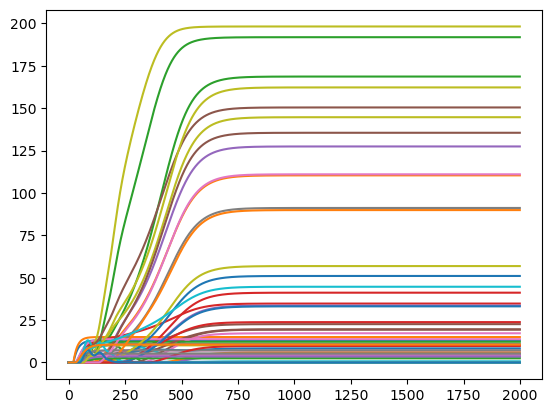

In [78]:
active_neurons = jnp.where(jnp.sum(R,axis=-1)>0)[0]
plt.plot(R[active_neurons].T)

In [86]:

# Get active MN activity using JAX-compatible approach
max_frs = jnp.max(R, axis=-1)
mn_mask = jnp.isin(jnp.arange(R.shape[0]), mn_idxs)
active_mask = ((max_frs>0) & mn_mask)

# Compute oscillation score
oscillation_score, _ = compute_oscillation_score(R[..., clip_start:], active_mask, prominence=0.05)


In [83]:
oscillation_score

Array(nan, dtype=float32)

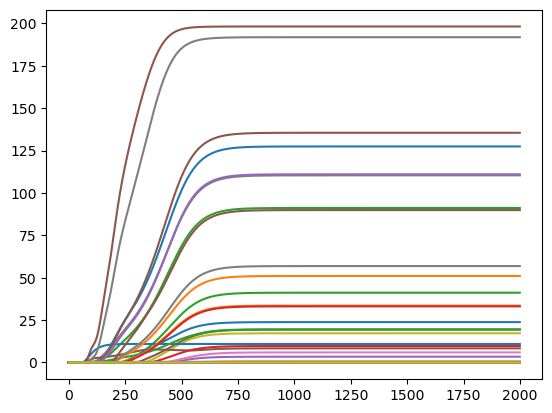

In [80]:
# R = batch_results[0]
R = results[0,1]


wTable = pd.read_csv("../data/manc t1 connectome data/wTable_20231020_DNtoMN_unsorted_withModules.csv",index_col=0)
nonMns = wTable.loc[(wTable["bodyId"]==10093) | (wTable["bodyId"]==10707) | (wTable["bodyId"]==13905) | (wTable["bodyId"]==11751)]
mnIdxs = wTable.loc[wTable["class"]=="motor neuron"].index


# for i in nonMns.index:
for i in mnIdxs:
    plt.plot(R[i])



# Stim Adjustment Testing

In [ ]:


def run_with_stim_adjustment(self,maxIters=10,clampedNeurons=[],clampedRates=None,nActiveUpper=500,nActiveLower=5,nHighFrUpper=100):
    nextHighest = None
    nextLowest = None

    for i in range(maxIters):
        self.run(clampedNeurons=clampedNeurons,clampedRates=clampedRates)
        R = self.R

        nActive = sum(np.sum(R,1)>0)
        nHighFr = sum(np.max(R,1)>100)

        currInputs = self.inputs.copy()

        print(f"Run {i}")
        print(f"max stimI = {np.max(currInputs)}")
        print(f"nActive: {nActive}")
        print(f"nHighFr: {nHighFr}")

        if (nActive > nActiveUpper) or (nHighFr > nHighFrUpper): # too strong
            if nextLowest is None:
                newInputs = currInputs/2
            else:
                newInputs = (currInputs+nextLowest)/2
            nextHighest = currInputs
        elif (nActive < nActiveLower): # too weak
            if nextHighest is None:
                newInputs = currInputs*2
            else:
                newInputs = (currInputs+nextHighest)/2
            nextLowest = currInputs
        else:
            break

        self.set_input(newInputs)

In [ ]:

# Note: The run_with_stim_adjustment function cannot be easily JIT-compiled
# because it involves loops with data-dependent control flow and side effects.
# Here's a restructured version that separates the JIT-able parts:

@jit
def compute_activity_metrics(R):
    """JIT-compatible function to compute activity metrics."""
    n_active = jnp.sum(jnp.sum(R, axis=1) > 0)
    n_high_fr = jnp.sum(jnp.max(R, axis=1) > 100)
    return n_active, n_high_fr

@jit
def update_inputs_binary_search(curr_inputs, next_lowest, next_highest, 
                               n_active, n_high_fr, n_active_upper, 
                               n_active_lower, n_high_fr_upper):
    """JIT-compatible input update logic."""
    
    # Determine if stimulation is too strong
    too_strong = (n_active > n_active_upper) | (n_high_fr > n_high_fr_upper)
    too_weak = n_active < n_active_lower
    
    # Update inputs based on binary search logic
    def update_for_too_strong():
        new_inputs = jnp.where(
            next_lowest is None,
            curr_inputs / 2,
            (curr_inputs + next_lowest) / 2
        )
        new_next_highest = curr_inputs
        return new_inputs, next_lowest, new_next_highest
    
    def update_for_too_weak():
        new_inputs = jnp.where(
            next_highest is None,
            curr_inputs * 2,
            (curr_inputs + next_highest) / 2
        )
        new_next_lowest = curr_inputs
        return new_inputs, new_next_lowest, next_highest
    
    def no_update():
        return curr_inputs, next_lowest, next_highest
    
    # Apply updates conditionally
    new_inputs, new_next_lowest, new_next_highest = jax.lax.cond(
        too_strong,
        update_for_too_strong,
        lambda: jax.lax.cond(
            too_weak,
            update_for_too_weak,
            no_update
        )
    )
    
    converged = ~too_strong & ~too_weak
    
    return new_inputs, new_next_lowest, new_next_highest, converged

# Example usage:
def run_with_stim_adjustment_jax(simulation_runner, max_iters=10, 
                                clamped_neurons=None, clamped_rates=None,
                                n_active_upper=500, n_active_lower=5, 
                                n_high_fr_upper=100):
    """
    JAX-compatible version of run_with_stim_adjustment.
    Note: This requires the simulation_runner to be compatible with JAX.
    """
    next_highest = None
    next_lowest = None
    
    for i in range(max_iters):
        # Run simulation (this part depends on your simulation framework)
        R = simulation_runner.run(clamped_neurons=clamped_neurons, 
                                 clamped_rates=clamped_rates)
        
        # Compute metrics (JIT-compiled)
        n_active, n_high_fr = compute_activity_metrics(R)
        curr_inputs = simulation_runner.get_inputs()
        
        print(f"Run {i}")
        print(f"max stimI = {jnp.max(curr_inputs)}")
        print(f"nActive: {n_active}")
        print(f"nHighFr: {n_high_fr}")
        
        # Update inputs (JIT-compiled)
        new_inputs, next_lowest, next_highest, converged = update_inputs_binary_search(
            curr_inputs, next_lowest, next_highest, n_active, n_high_fr,
            n_active_upper, n_active_lower, n_high_fr_upper
        )
        
        if converged:
            break
            
        simulation_runner.set_input(new_inputs)

# Additional utility functions for JAX compatibility:

@jit
def safe_divide(x, y, default=0.0):
    """Safe division that handles division by zero."""
    return jnp.where(y == 0, default, x / y)

@jit
def safe_max(x, default=0.0):
    """Safe max that handles empty arrays."""
    return jnp.where(len(x) == 0, default, jnp.max(x))

@jit
def safe_min(x, default=0.0):
    """Safe min that handles empty arrays."""
    return jnp.where(len(x) == 0, default, jnp.min(x))